In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import glob

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from adapters import *
from dataset import NumpyCsvDataSet
from runner import ExptRunner
from networks.autoencoder import AutoEncoder
from networks.composedautoencoder import ComposedAutoEncoder
from networks.DenseAutoEncoder import DenseAutoEncoder
from networks.ConvVae import ConvVae
from networks.vae import VAE
from networks.etpr.autoencoder import autoencoder as etprautoenc
from networks.dense import Dense
from networks.lossfunctions import *
from helpers import ReportResults

In [3]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)

In [4]:
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
print (device)

cpu


In [5]:
start = time.time()
data_folder = 'data/demoplanner/version1'
v1_train_data = NumpyCsvDataSet(data_folder + '/train.csv', device=device)
v1_test_data = NumpyCsvDataSet(data_folder + '/test.csv', device=device)
print ("Time Taken: {} sec".format(time.time() - start))

Time Taken: 28.116352081298828 sec


In [19]:
start = time.time()
data_folder = 'data/demoplanner/version2'
v2_train_data = NumpyCsvDataSet(data_folder + '/train.csv', device=device)
v2_test_data = NumpyCsvDataSet(data_folder + '/test.csv', device=device)
print ("Time Taken: {} sec".format(time.time() - start))

Time Taken: 301.2297029495239 sec


In [6]:
train_data = v1_train_data
test_data = v1_test_data

In [7]:
print (train_data.data.shape)
print (test_data.data.shape)

print (train_data.data.device)
print (test_data.data.device)

torch.Size([13280, 2058])
torch.Size([1341, 2058])
cpu
cpu


In [52]:
expts = [
    ['Policy-V1-Dense-CE', lambda: Dense([4, 64, 6]), policy_input_adapter, control_ce_loss_adapter, policy_groud_truth_adapter, None],
#     ['Policy-V1-Dense-BCE', lambda: Dense([4, 64, 6]), policy_input_adapter, bce_loss_adapter, policy_groud_truth_one_hot_adapter, None],
]

In [53]:
train_epochs = 100
for i in range(len(expts)):
    inputs = expts[i]
    net = inputs[1]()
    net = net.to(device)
    runner = ExptRunner(inputs[0], net, train_data, test_data, 
                        inputs[2], inputs[3], inputs[4], data_to_img_func=inputs[5])
    print ("Log folder for expt {}: {}".format(i, runner.log_folder))
    runner.train(train_epochs, shouldShowReconstruction=False)
    runner.test()

Log folder for expt 0: runs/04-07-17-58-07-Policy-V1-Dense-CE
--------------------------------------------
        Network Structure
--------------------------------------------
--------------------------------------------
        Network Parameter Statistics
--------------------------------------------
Params for layer 1 = 256
Params for layer 2 = 64
Params for layer 3 = 384
Params for layer 4 = 6
--------------------------------------------
Total: 710
--------------------------------------------
2020-04-07 17:58:08.112073: Epoch 0 Begin


/Users/pradeepkadubandi/GH/PradeepKadubandi/DemoPlanner/adapters.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  u = torch.tensor(data[:, u_begin:u_begin+u_dim] + 1.0, dtype=torch.long).detach()


2020-04-07 17:58:08.722441: Eval at Index 99 Begin
[1,   100] Average Minibatch loss: 2.157
MinibatchIndex 99: Training Loss (Max 10000 rows): 2.107891082763672
MinibatchIndex 99: Test Loss: 2.1266136169433594
2020-04-07 17:58:09.105100: Eval at Index 99 End
2020-04-07 17:58:09.387740: Epoch 1 Begin
2020-04-07 17:58:09.754666: Eval at Index 232 Begin
[2,   100] Average Minibatch loss: 2.684
MinibatchIndex 232: Training Loss (Max 10000 rows): 1.9352061748504639
MinibatchIndex 232: Test Loss: 1.964280605316162
2020-04-07 17:58:09.777097: Eval at Index 232 End
2020-04-07 17:58:09.886177: Epoch 2 Begin
2020-04-07 17:58:10.275080: Eval at Index 365 Begin
[3,   100] Average Minibatch loss: 2.494
MinibatchIndex 365: Training Loss (Max 10000 rows): 1.8204059600830078
MinibatchIndex 365: Test Loss: 1.8565309047698975
2020-04-07 17:58:10.284137: Eval at Index 365 End
2020-04-07 17:58:10.398974: Epoch 3 Begin
2020-04-07 17:58:10.875084: Eval at Index 498 Begin
[4,   100] Average Minibatch loss: 2

2020-04-07 17:58:25.504180: Epoch 27 Begin
2020-04-07 17:58:25.907176: Eval at Index 3690 Begin
[28,   100] Average Minibatch loss: 1.862
MinibatchIndex 3690: Training Loss (Max 10000 rows): 1.3970715999603271
MinibatchIndex 3690: Test Loss: 1.4129819869995117
2020-04-07 17:58:25.916001: Eval at Index 3690 End
2020-04-07 17:58:26.180317: Epoch 28 Begin
2020-04-07 17:58:26.824168: Eval at Index 3823 Begin
[29,   100] Average Minibatch loss: 1.848
MinibatchIndex 3823: Training Loss (Max 10000 rows): 1.3889743089675903
MinibatchIndex 3823: Test Loss: 1.4064853191375732
2020-04-07 17:58:26.857524: Eval at Index 3823 End
2020-04-07 17:58:27.569630: Epoch 29 Begin
2020-04-07 17:58:28.461810: Eval at Index 3956 Begin
[30,   100] Average Minibatch loss: 1.838
MinibatchIndex 3956: Training Loss (Max 10000 rows): 1.381697416305542
MinibatchIndex 3956: Test Loss: 1.3996354341506958
2020-04-07 17:58:28.500205: Eval at Index 3956 End
2020-04-07 17:58:28.722857: Epoch 30 Begin
2020-04-07 17:58:29.28

2020-04-07 17:58:42.320026: Eval at Index 7281 Begin
[55,   100] Average Minibatch loss: 1.712
MinibatchIndex 7281: Training Loss (Max 10000 rows): 1.2907733917236328
MinibatchIndex 7281: Test Loss: 1.3096815347671509
2020-04-07 17:58:42.328157: Eval at Index 7281 End
2020-04-07 17:58:42.431447: Epoch 55 Begin
2020-04-07 17:58:42.741813: Eval at Index 7414 Begin
[56,   100] Average Minibatch loss: 1.716
MinibatchIndex 7414: Training Loss (Max 10000 rows): 1.2886433601379395
MinibatchIndex 7414: Test Loss: 1.3083512783050537
2020-04-07 17:58:42.750333: Eval at Index 7414 End
2020-04-07 17:58:42.891081: Epoch 56 Begin
2020-04-07 17:58:43.248059: Eval at Index 7547 Begin
[57,   100] Average Minibatch loss: 1.707
MinibatchIndex 7547: Training Loss (Max 10000 rows): 1.2862293720245361
MinibatchIndex 7547: Test Loss: 1.3066492080688477
2020-04-07 17:58:43.256632: Eval at Index 7547 End
2020-04-07 17:58:43.357002: Epoch 57 Begin
2020-04-07 17:58:43.789122: Eval at Index 7680 Begin
[58,   100]

2020-04-07 17:58:55.541269: Eval at Index 10872 Begin
[82,   100] Average Minibatch loss: 1.669
MinibatchIndex 10872: Training Loss (Max 10000 rows): 1.2543460130691528
MinibatchIndex 10872: Test Loss: 1.275336503982544
2020-04-07 17:58:55.552976: Eval at Index 10872 End
2020-04-07 17:58:55.665994: Epoch 82 Begin
2020-04-07 17:58:55.979117: Eval at Index 11005 Begin
[83,   100] Average Minibatch loss: 1.667
MinibatchIndex 11005: Training Loss (Max 10000 rows): 1.2536652088165283
MinibatchIndex 11005: Test Loss: 1.27573823928833
2020-04-07 17:58:55.987492: Eval at Index 11005 End
2020-04-07 17:58:56.087874: Epoch 83 Begin
2020-04-07 17:58:56.430663: Eval at Index 11138 Begin
[84,   100] Average Minibatch loss: 1.663
MinibatchIndex 11138: Training Loss (Max 10000 rows): 1.2529172897338867
MinibatchIndex 11138: Test Loss: 1.273928165435791
2020-04-07 17:58:56.445514: Eval at Index 11138 End
2020-04-07 17:58:56.601069: Epoch 84 Begin
2020-04-07 17:58:57.080357: Eval at Index 11271 Begin
[8

In [54]:
test_data_float = v1_test_data.data.float()
train_data_float = v1_train_data.data.float()

In [55]:
map_netname_net = {
    'ComposedAutoEncoderWithMaxPool': lambda: ComposedAutoEncoder(useMaxPool=True),
    'DenseAutoEncoder3': lambda: DenseAutoEncoder(enc_layer_dims=[1024, 128, 16]),
    'ComposedAutoEncoderNoMaxPool': lambda: ComposedAutoEncoder(useMaxPool=False),
    'VAE': VAE,
    'ConvVAE': ConvVae,
    'EtprEncoder': etprautoenc,
    '03-31-18-02-15-Dynamics-V1-Dense-SmoothL1': lambda: Dense([4, 2]),
    '03-31-18-02-32-Dynamics-V1-Dense-SmoothL1': lambda: Dense([4, 8, 2]),
    '03-31-18-02-52-Dynamics-V1-Dense-SmoothL1': lambda: Dense([4, 16, 2]),
    '03-31-18-01-03-Dynamics-V1-Dense-MSE': lambda: Dense([4, 2]),
    '03-31-18-01-22-Dynamics-V1-Dense-MSE': lambda: Dense([4, 8, 2]),
    '03-31-18-01-50-Dynamics-V1-Dense-MSE': lambda: Dense([4, 16, 2]),
    '04-07-17-58-07-Policy-V1-Dense-CE': lambda: Dense([4, 64, 6]),
}

# Notes: 
#  Input normalization (bringing the data to [0, 1]) interval improved the convergence loss
#  Turning off bias is performing worse      

In [61]:
rr = ReportResults(map_netname_net, device, 
                   policy_input_adapter, policy_groud_truth_adapter,
                   loss_adapter_func = control_ce_loss_adapter)

In [62]:
rr.generate_csv_comparison_report(test_data_float, train_data_float,
                   rootdir='runs/04-07')

Time,Goal,DataSet,Network,Loss(Training),TestLoss,TrainLoss
04:07:17:58:07,Policy,V1,Dense,CE,1.2633792161941528,1.2391564846038818


In [35]:
sample = torch.cat((test_data_float[1055:1060], test_data_float[1230:1235]), axis=0)
ground_truth = dynamics_gradient_ground_truth_adapter(sample)
for folder, net in rr.build_net(rootdir='runs/03-31/run2/03-31-18-01-22-Dynamics-V1-Dense-MSE'):
    print ('Folder: ' + folder)
    op_batch, loss = rr.run_mini_batch(net, sample)
    row_loss = F.l1_loss(ground_truth, op_batch, reduction='none')
    print (torch.cat((ground_truth, op_batch, row_loss), axis=1))
    # print(torch.max(row_loss, axis=0))

Folder: 03-31-18-01-22-Dynamics-V1-Dense-MSE
tensor([[0.0000e+00, 5.0000e-01, 4.6587e-03, 5.0098e-01, 4.6587e-03, 9.8205e-04],
        [0.0000e+00, 0.0000e+00, 6.5376e-03, 6.0927e-03, 6.5376e-03, 6.0927e-03],
        [0.0000e+00, 5.0000e-01, 4.6546e-03, 4.9954e-01, 4.6546e-03, 4.5604e-04],
        [0.0000e+00, 5.0000e-01, 4.6546e-03, 4.9960e-01, 4.6546e-03, 4.0260e-04],
        [0.0000e+00, 5.0000e-01, 4.6546e-03, 4.9965e-01, 4.6546e-03, 3.4928e-04],
        [1.0000e+00, 0.0000e+00, 9.9535e-01, 3.8400e-03, 4.6490e-03, 3.8400e-03],
        [1.0000e+00, 0.0000e+00, 9.9535e-01, 3.8399e-03, 4.6488e-03, 3.8399e-03],
        [1.0000e+00, 0.0000e+00, 9.9535e-01, 3.8397e-03, 4.6484e-03, 3.8397e-03],
        [1.0000e+00, 0.0000e+00, 9.9535e-01, 3.8396e-03, 4.6482e-03, 3.8396e-03],
        [1.0000e+00, 5.0000e-01, 9.9402e-01, 4.6098e-01, 5.9755e-03, 3.9022e-02]],
       grad_fn=<CatBackward>)


datapoint 0 test error tensor(9.2288e-06)


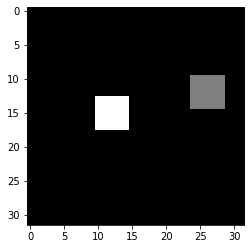

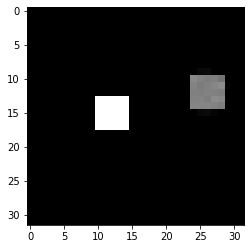

datapoint 1 test error tensor(9.4870e-06)


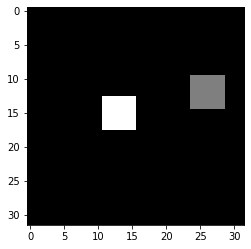

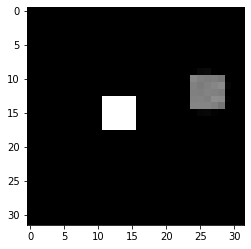

datapoint 2 test error tensor(1.5805e-05)


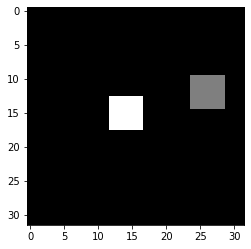

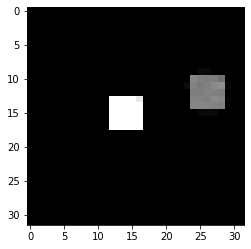

datapoint 3 test error tensor(1.1305e-05)


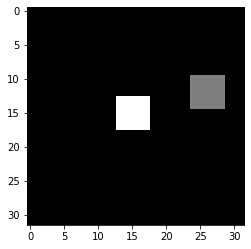

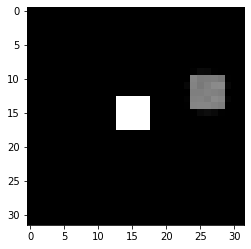

datapoint 4 test error tensor(1.3016e-05)


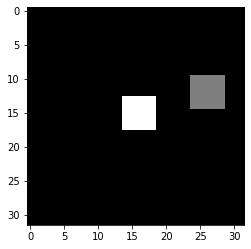

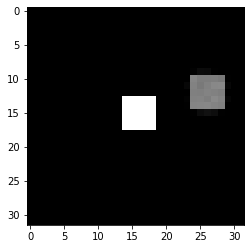

In [16]:
rr.show_test_samples(test_data_float,
                  rootdir='runs/03-28/03-28-14-10-20-DemoPl-V2-ComposedAutoEncoderWithMaxPool-SmoothL1-')

In [ ]:
np.set_printoptions(**opt)

In [97]:
input = test_data_float[10:20, 1028:1030]
print (input)
print ((input + 1.0) / 2)

tensor([[ 0.,  1.],
        [-1.,  1.],
        [-1.,  1.],
        [-1.,  1.],
        [ 0., -1.],
        [ 0., -1.],
        [ 0., -1.],
        [ 0., -1.],
        [ 0., -1.],
        [ 1., -1.]])
tensor([[0.5000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.0000, 1.0000],
        [0.5000, 0.0000],
        [0.5000, 0.0000],
        [0.5000, 0.0000],
        [0.5000, 0.0000],
        [0.5000, 0.0000],
        [1.0000, 0.0000]])
